# MLT Assignment 1: Predicting Life Expectancy Using Machine Learning

## Project scope:
 The scope of this project is ” Predicting Life Expectancy Using Machine Learning” in this project we are given the task to predict life expectancy, life expectancy is the average time period for which the subject lives.

### 1.  INTRODUCTION
####  1.1          Overview:

 This project is based on predicting the life expectancy of a person. It is the statistical average of the number of years a person is expected to live. Factors affecting life expectancy are Country, Mental and Physical Illness, lifestyle, diet, health care services, financial condition, BMI, alcohol consumption, Diseases, etc.

Here in this Predicting Life Expectancy project, our motive is to find the life expectancy of a person after providing details such as the country he is living in is developed or is developing, BMI of the person, Disease history, Income, Population of that country, Expenditure, etc. So here I have used Machine learning and Artificial Intelligence to predict life expectancy. The data used in the training of the model was the data by WHO taken from Kaggle.

There were almost 22 columns stating different factors affecting Life expectancy and 2939 rows comprising data of different persons from different countries.

### 1.2 Dataset Info.

1. Country – Name of the country.
2. Year – Year of data collection.
3. Status – Development status of the country (Developed/Developing).
4. Life expectancy – Average expected lifespan at birth (in years).
5. Adult Mortality – Probability of dying between ages 15–60 per 1,000 population.
6. Infant deaths – Number of deaths of infants under 1 year per 1,000 live births.
7. Alcohol – Per capita alcohol consumption (in liters).
8. Percentage expenditure – Government health expenditure as a percentage of GDP.
9. Hepatitis B – Percentage of children immunized against Hepatitis B.
10. Measles – Number of reported measles cases per 1,000 population.
11. BMI – Average Body Mass Index of the population.
12. Under-five deaths – Number of deaths of children under five per 1,000 live births.
13. Polio – Percentage of children immunized against polio.
14. Total expenditure – Total health expenditure as a percentage of GDP.
15. Diphtheria – Percentage of children immunized against Diphtheria.
16. HIV/AIDS – Adult prevalence of HIV/AIDS (in percentage).
17. GDP – Gross Domestic Product per capita.
18. Population – Total population of the country.
19. Thinness 1-19 years – Percentage of thinness among individuals aged 1–19 years.
20. Thinness 5-9 years – Percentage of thinness among children aged 5–9 years.
21. Income composition of resources – Human Development Index (HDI)-based income composition.
22. Schooling – Average number of years of schooling.

### The data is taken from kaggle https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

## 2.  Project Structure
#### 2.1   Data Preprocessing:(Cleaning and Feature Engeneering)
#### 2.2 EDA: Exploratory Data Analysis
#### 2.3 Model Training: Using different ML techniques and approaches
#### 2.4 Metrics Evaluation: Performance of model



In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/Life Expectancy Data.csv'
df= pd.read_csv(file_path)

print(df.head())

Mounted at /content/drive
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         

##DATA PREPROCESSING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
df.isnull().sum().sum() #total null values

2563

there are total 2563 null values , now we will treat null values using the KNN IMPUTER function

In [ ]:
from sklearn.impute import KNNImputer

# Define the numeric columns explicitly
num_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
            ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
            'Population', ' thinness  1-19 years', ' thinness 5-9 years',
            'Income composition of resources', 'Schooling']

# Ensure the column names exist in the DataFrame
num_cols = [col for col in num_cols if col in df.columns]

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])


In [ ]:
df[num_cols]

Life expectancy   Adult Mortality  Alcohol  Hepatitis B   BMI   Polio  \
0                 65.0            263.0     0.01         65.0   19.1    6.0   
1                 59.9            271.0     0.01         62.0   18.6   58.0   
2                 59.9            268.0     0.01         64.0   18.1   62.0   
3                 59.5            272.0     0.01         67.0   17.6   67.0   
4                 59.2            275.0     0.01         68.0   17.2   68.0   
...                ...              ...      ...          ...    ...    ...   
2933              44.3            723.0     4.36         68.0   27.1   67.0   
2934              44.5            715.0     4.06          7.0   26.7    7.0   
2935              44.8             73.0     4.43         73.0   26.3   73.0   
2936              45.3            686.0     1.72         76.0   25.9   76.0   
2937              46.0            665.0     1.68         79.0   25.5   78.0   

      Total expenditure  Diphtheria          GDP  Population  \
0                  8.16         65.0  584.259210  33736494.0   
1                  8.18         62.0  612.696514    327582.0   
2                  8.13         64.0  631.744976  31731688.0   
3                  8.52         67.0  669.959000   3696958.0   
4                  7.87         68.0   63.537231   2978599.0   
...                 ...          ...         ...         ...   
2933               7.13         65.0  454.366654  12777511.0   
2934               6.52         68.0  453.351155  12633897.0   
2935               6.53         71.0   57.348340    125525.0   
2936               6.16         75.0  548.587312  12366165.0   
2937               7.10         78.0  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 14 columns]

In [ ]:
df[num_cols].isnull().sum()

Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
 BMI                               0
Polio                              0
Total expenditure                  0
Diphtheria                         0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df[num_cols]

Life expectancy   Adult Mortality  Alcohol  Hepatitis B   BMI   Polio  \
0                 65.0            263.0     0.01         65.0   19.1    6.0   
1                 59.9            271.0     0.01         62.0   18.6   58.0   
2                 59.9            268.0     0.01         64.0   18.1   62.0   
3                 59.5            272.0     0.01         67.0   17.6   67.0   
4                 59.2            275.0     0.01         68.0   17.2   68.0   
...                ...              ...      ...          ...    ...    ...   
2933              44.3            723.0     4.36         68.0   27.1   67.0   
2934              44.5            715.0     4.06          7.0   26.7    7.0   
2935              44.8             73.0     4.43         73.0   26.3   73.0   
2936              45.3            686.0     1.72         76.0   25.9   76.0   
2937              46.0            665.0     1.68         79.0   25.5   78.0   

      Total expenditure  Diphtheria          GDP  Population  \
0                  8.16         65.0  584.259210  33736494.0   
1                  8.18         62.0  612.696514    327582.0   
2                  8.13         64.0  631.744976  31731688.0   
3                  8.52         67.0  669.959000   3696958.0   
4                  7.87         68.0   63.537231   2978599.0   
...                 ...          ...         ...         ...   
2933               7.13         65.0  454.366654  12777511.0   
2934               6.52         68.0  453.351155  12633897.0   
2935               6.53         71.0   57.348340    125525.0   
2936               6.16         75.0  548.587312  12366165.0   
2937               7.10         78.0  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 14 columns]

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Outlier Count per Column: {'Year': 0, 'Life expectancy ': 12, 'Adult Mortality': 85, 'infant deaths': 315, 'Alcohol': 1, 'percentage expenditure': 389, 'Hepatitis B': 240, 'Measles ': 542, ' BMI ': 0, 'under-five deaths ': 394, 'Polio': 281, 'Total expenditure': 41, 'Diphtheria ': 300, ' HIV/AIDS': 542, 'GDP': 401, 'Population': 334, ' thinness  1-19 years': 89, ' thinness 5-9 years': 99, 'Income composition of resources': 131, 'Schooling': 41}


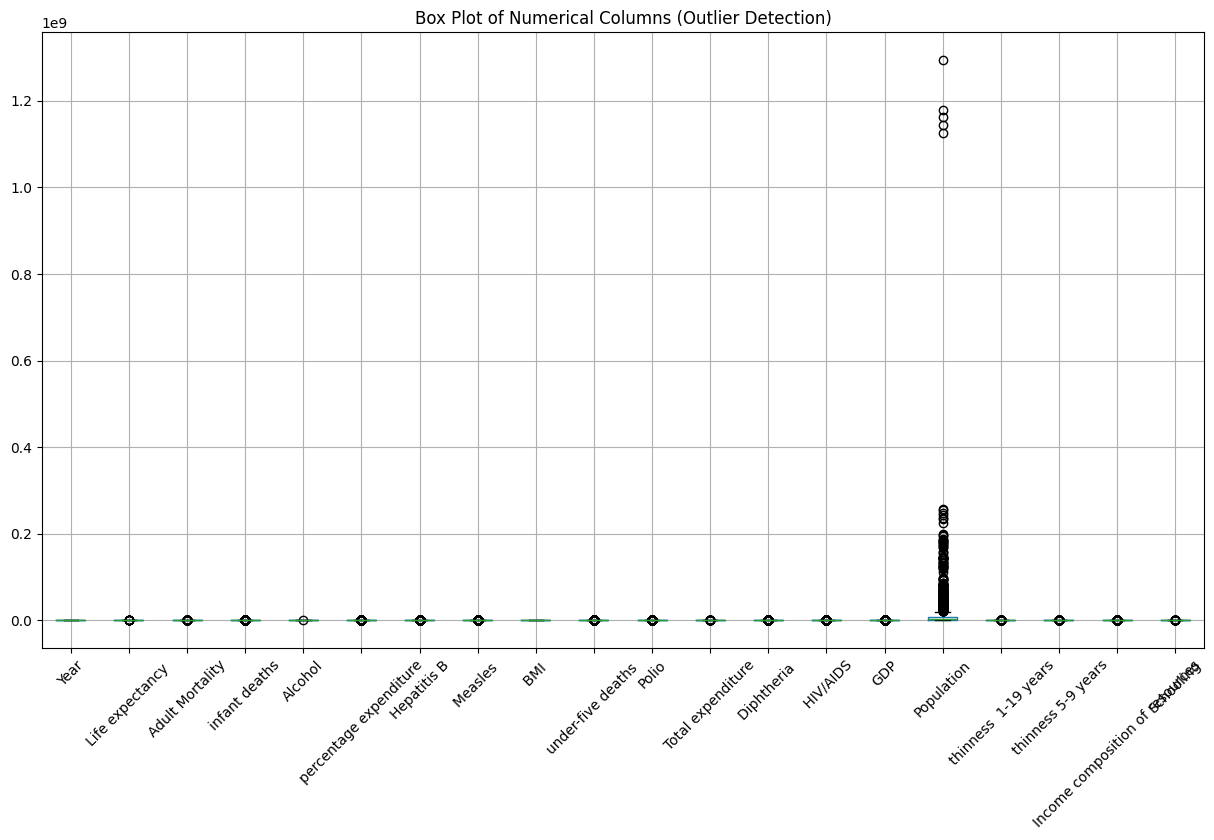

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns correctly
num_cols = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
            'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ',
            ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
            'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
            ' thinness  1-19 years', ' thinness 5-9 years',
            'Income composition of resources', 'Schooling']

# Ensure only existing numerical columns are selected
num_cols = [col for col in num_cols if col in df.columns and np.issubdtype(df[col].dtype, np.number)]

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_dict[col] = len(outliers)  # Count of outliers per column

    return outlier_dict

# Detect outliers in numerical columns
outlier_counts = detect_outliers(df, num_cols)
print("Outlier Count per Column:", outlier_counts)

# Plot box plots for numerical columns
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)  # Rotate labels for readability
plt.title("Box Plot of Numerical Columns (Outlier Detection)")
plt.show()



**Inference on the basis of outlier detection:**
 **Outlier Count:**
  
    'infant deaths': 315, 'percentage expenditure': 389, 'Hepatitis B': 240, 'Measles ': 542,  'under-five deaths ': 394, 'Polio': 281,'Diphtheria ': 300, ' HIV/AIDS': 542, 'GDP': 401, 'Population': 334, 'Income composition of resources': 131
    
    these columns have very high level of outliers

    1. Several features show significant outliers, especially Measles, Infant Deaths, Percentage Expenditure, and Population.
    2. The GDP and Population columns have extreme outliers, with Population values reaching close to 1.2 billion, likely representing countries like India or China.
    3. Measles has the highest number of outliers (542 instances), suggesting significant variations in reported measles cases.
    4. Infant Deaths and Under-Five Deaths show many extreme values, likely indicating high child mortality in certain regions.
    

In [ ]:
#Label Encoding for Country
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])




In [ ]:
# Extracting Decade from Year
df['Decade'] = (df['Year'] // 10) * 10


In [ ]:
#Creating Interaction Features
# Ratio Features
df['GDP_per_capita'] = df['GDP'] / (df['Population'] + 1e-6)
df['Health_Expenditure_ratio'] = df['Total expenditure'] / (df['GDP'] + 1e-6)


In [ ]:
#Log Transformations for Skewed Data
import numpy as np
df['Log_GDP'] = np.log1p(df['GDP'])
df['Log_Population'] = np.log1p(df['Population'])


In [ ]:
# Feature Extraction
df['Mortality Rate'] = df['Adult Mortality'] + df['infant deaths']
df['Wealth Index'] = df['GDP'] * df['Income composition of resources']




In [ ]:
#Box-Cox Transformation (For Skewed Data)
from scipy.stats import boxcox

df['Transformed_GDP'], _ = boxcox(df['GDP'] + 1)  # +1 to avoid log(0) issue




In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df[['GDP', 'Population']] = pt.fit_transform(df[['GDP', 'Population']])
#Improves model performance by normalizing data.


In [ ]:
#Temporal Features
df['Decade'] = (df['Year'] // 10) * 10
df['Year_Offset'] = df['Year'] - df['Year'].min()


In [ ]:
# Dimensionality Reduction (Feature Selection)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df_pca = pca.fit_transform(df.select_dtypes(include=['float64', 'int64']))



Printing the final dataset after all the data prepricessing required and encoding.

In [ ]:

df.head(2)

Country  Year      Status  Life expectancy   Adult Mortality  \
0        0  2015  Developing              65.0            263.0   
1        0  2014  Developing              59.9            271.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   

   Schooling  Decade  GDP_per_capita  Health_Expenditure_ratio   Log_GDP  \
0       10.1    2010        0.000017                  0.013966  6.372055   
1       10.0    2010        0.001870                  0.013351  6.419501   

   Log_Population  Mortality Rate  Wealth Index  Transformed_GDP  Year_Offset  
0       17.334091           325.0    279.860162         7.126378           15  
1       12.699497           335.0    291.643541         7.185532           14  

[2 rows x 31 columns]

In [ ]:
!pip install plotly

import plotly.express as px

In [ ]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

Treating the outliers wherever is necessary:

In [ ]:
cols_to_handle_outliers = [ "Adult Mortality","infant deaths","percentage expenditure", "Hepatitis B","Measles ",
            " HIV/AIDS","under-five deaths ", "Polio", "Total expenditure", "Diphtheria ", "GDP_per_capita"
            , " thinness  1-19 years", " thinness 5-9 years","Wealth Index","Mortality Rate",
            "Income composition of resources"
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Check if the column exists in the DataFrame
    if col_name in df.columns:
        # Calculate quartiles and IQR
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replace outliers with the mean value of the column
        df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])
    else:
        print(f"Column '{col_name}' not found in DataFrame. Skipping...")

In [ ]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')

    # Update layout to center the title and make it bold
    fig.update_layout(
        title=dict(text=f'<b>Box Plot for {column}</b>', x=0.5),
        boxmode='group'
    )

    fig.show()

## Data vizualization:

In [ ]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developing']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

1. majority of life expectancy values fall between 65 and 75 years, with a peak around 70 years.
2.The histogram appears right-skewed, meaning some developing countries still have very low life expectancy.

**Conclusion:**
1. many developing countries have made progress in improving healthcare and living conditions.
2.  low life expectancy in range<50 years , likely due to poor healthcare or high disease prevalence.
3. Some countries have life expectancy below 40 years, likely due to extreme poverty or high disease burden .

In [ ]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developed']

# Create a histogram
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

Interpretation:
1. The majority of the population in developed countries has a life expectancy between 75 and 85 years.
2. The histogram shows a peak around 78-82 years, indicating that most individuals in developed nations tend to live within this range.
3. The distribution appears more balanced compared to developing countries, which often show greater variation in life expectancy.

Conclusions:

1. Developed countries generally have higher life expectancy, with most individuals living well into their 70s and 80s.
2. Healthcare, economic stability, and living conditions contribute to longer lifespans in developed regions.

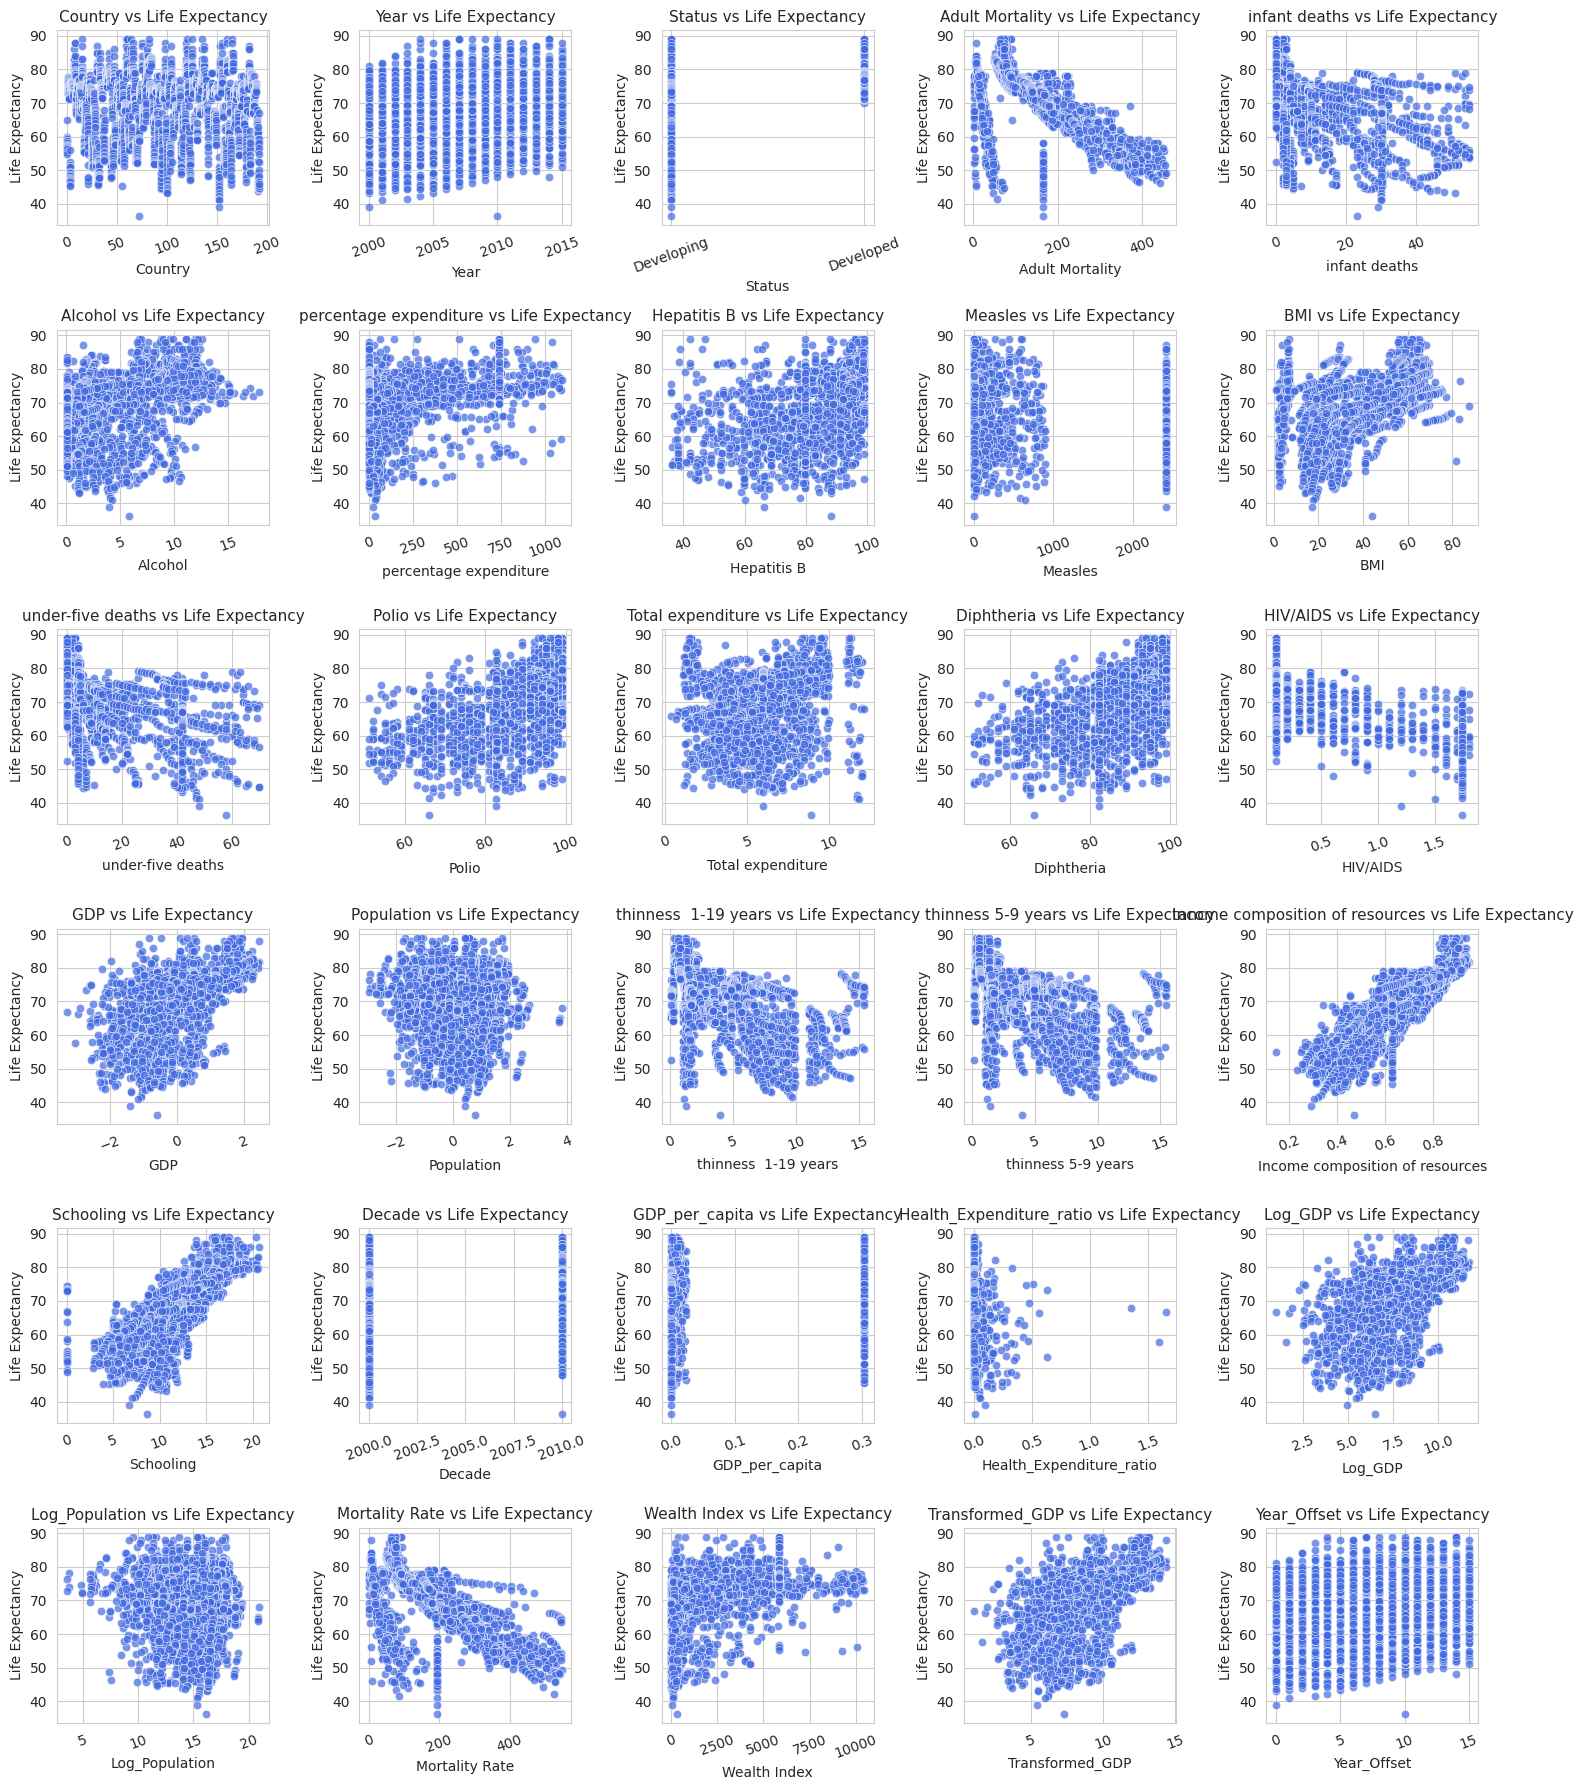

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
sns.set_style("whitegrid")

# Rename columns to remove spaces
df.columns = df.columns.str.strip()

# Get all feature columns except 'Life expectancy'
feature_columns = [col for col in df.columns if col != "Life expectancy"]

# Calculate the number of rows and columns for subplots
num_cols = 5  # Number of columns in the grid
num_rows = int(np.ceil(len(feature_columns) / num_cols))  # Calculate rows needed

# Create plots for each feature vs Life Expectancy
plt.figure(figsize=(15, num_rows * 3))  # Adjust figure height based on rows

for i, column in enumerate(feature_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots dynamically
    sns.scatterplot(data=df, x=column, y="Life expectancy", alpha=0.7, color="royalblue")
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Life Expectancy", fontsize=10)
    plt.title(f"{column} vs Life Expectancy", fontsize=11)
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

1. Adult Mortality vs. Life Expectancy (Strong Negative Correlation):
higher mortality rates contribute to a lower average lifespan.
2. Infant Deaths vs. Life Expectancy (Negative Correlation):Indicates poor healthcare infrastructure and high child mortality reducing overall life expectancy.

#### Adult Mortality vs Life Expectancy

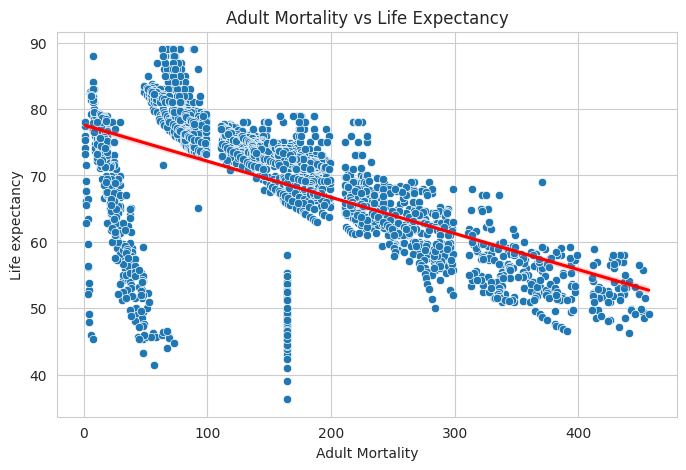

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Adult Mortality"], y=df["Life expectancy"])
sns.regplot(x=df["Adult Mortality"], y=df["Life expectancy"], scatter=False, color='red')
plt.title("Adult Mortality vs Life Expectancy")
plt.show()

- The graph shows that when more adults die at a younger age, the average lifespan of people in a country decreases.
- This is a negative correlation, meaning that as one value (adult mortality) goes up, the other (life expectancy) goes down.
- The red line (regression line) represents the general trend, showing that countries with higher death rates have shorter lifespans.

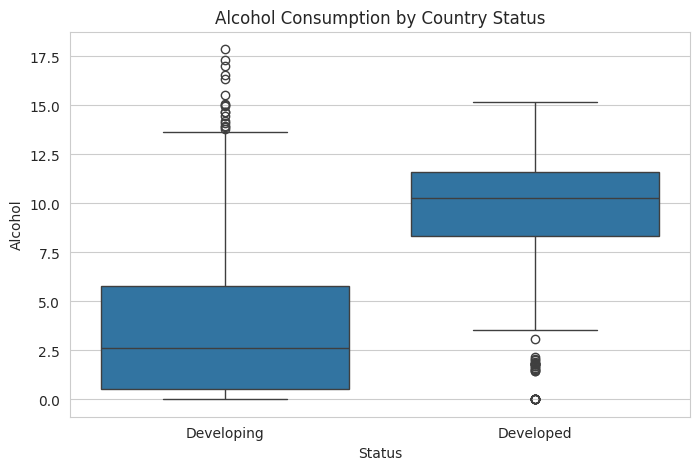

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Status"], y=df["Alcohol"])
plt.title("Alcohol Consumption by Country Status")
plt.show()

- Developed countries consume more alcohol on average than developing ones.
- Median consumption is higher in developed nations.
- Developing countries show more variability with many outliers.
- Developed countries have a tighter range, indicating more consistent consumption.

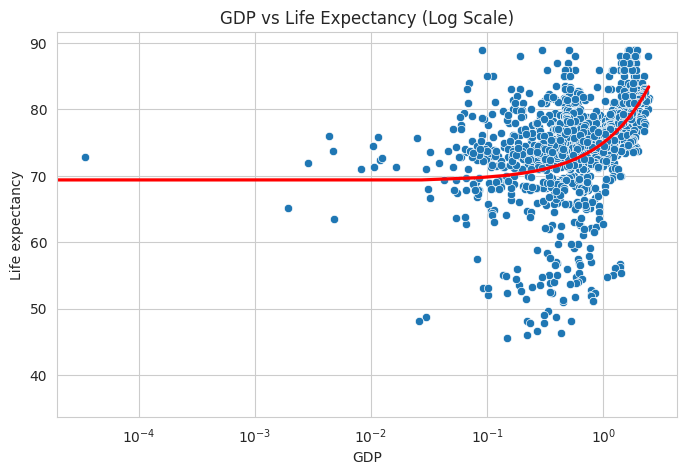

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["GDP"], y=df["Life expectancy"])
sns.regplot(x=df["GDP"], y=df["Life expectancy"], scatter=False, color='red')
plt.xscale("log")
plt.title("GDP vs Life Expectancy (Log Scale)")
plt.show()

This scatter plot shows the relationship between GDP and Life Expectancy on a log scale. The red curve suggests a non-linear positive correlation, where higher GDP generally leads to higher life expectancy. However, the impact is more significant at lower GDP levels, while at higher GDP, life expectancy increases at a slower rate.

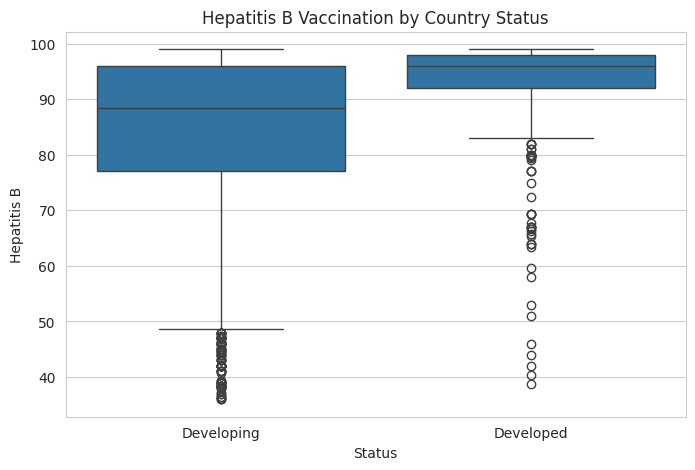

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Status"], y=df["Hepatitis B"])
plt.title("Hepatitis B Vaccination by Country Status")
plt.show()

This box plot compares Hepatitis B vaccination rates between developing and developed countries. Developed countries generally have a higher and more consistent vaccination rate, with fewer variations. In contrast, developing countries show greater variability, with some having lower vaccination rates and more outliers, indicating disparities in healthcare accessibility.

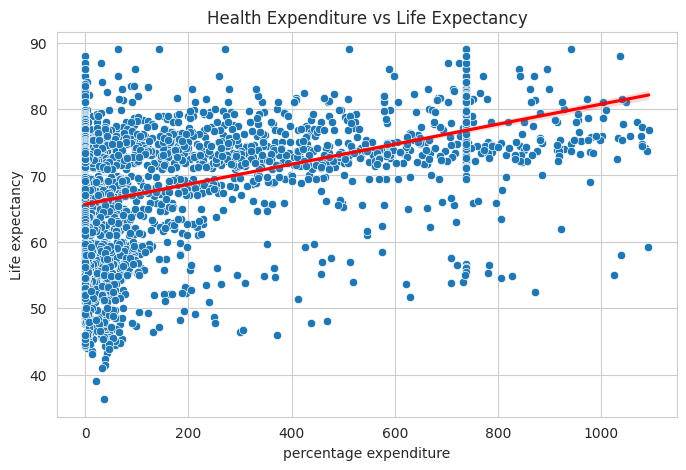

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["percentage expenditure"], y=df["Life expectancy"])
sns.regplot(x=df["percentage expenditure"], y=df["Life expectancy"], scatter=False, color='red')
plt.title("Health Expenditure vs Life Expectancy")
plt.show()

The scatter plot shows a positive correlation between health expenditure and life expectancy—higher spending generally leads to longer life expectancy, though with diminishing returns at higher expenditures.









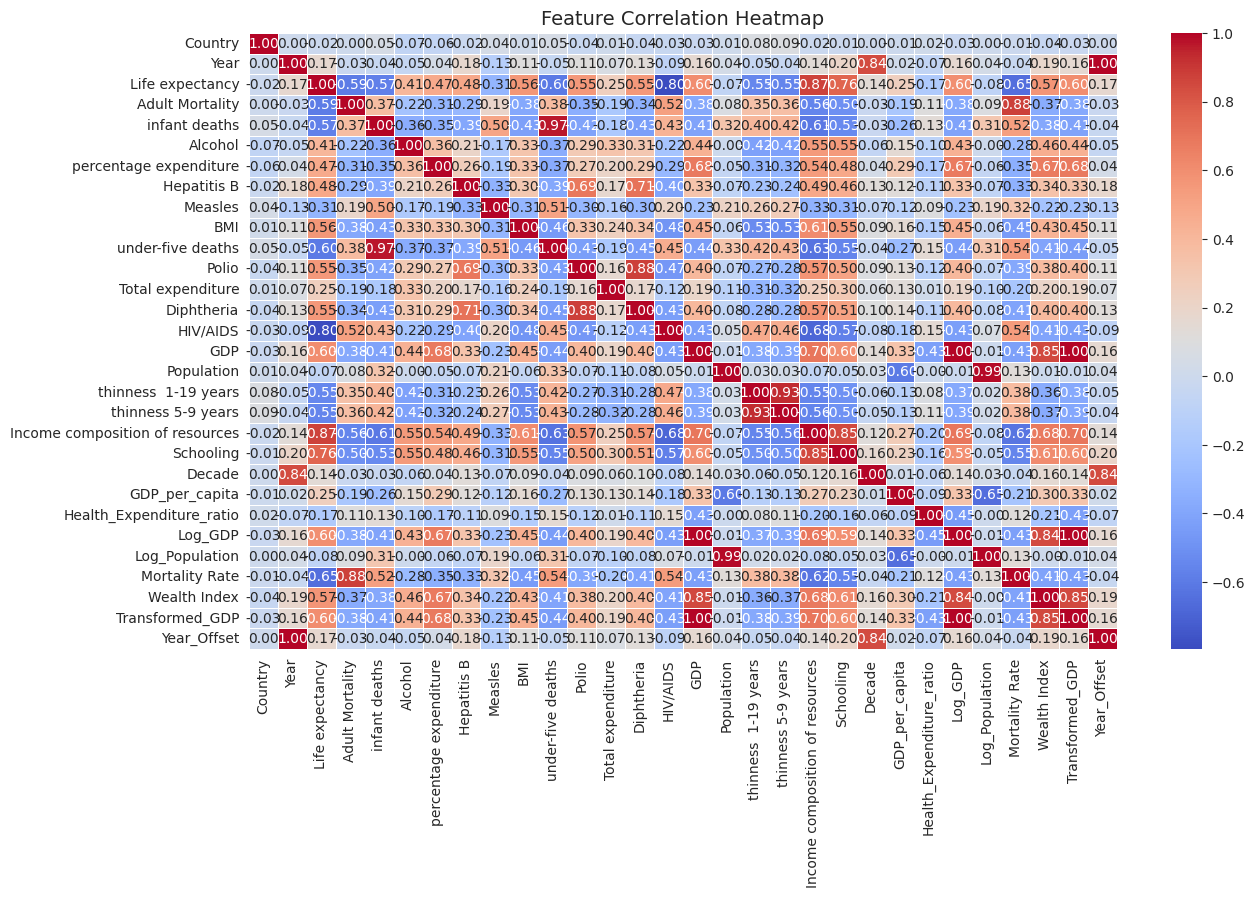

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Model Training

In [ ]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [ ]:
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 30)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 30)
Shape of Y_test is: (588,)


In [ ]:
!pip install tensorflow # Install TensorFlow if not already installed

import tensorflow as tf # Import TensorFlow

from tensorflow.keras.models import Sequential # Import the Sequential model
from tensorflow.keras.layers import Dense # Import the Dense layer

model = Sequential([
    Dense(64, activation='relu', input_dim=21),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

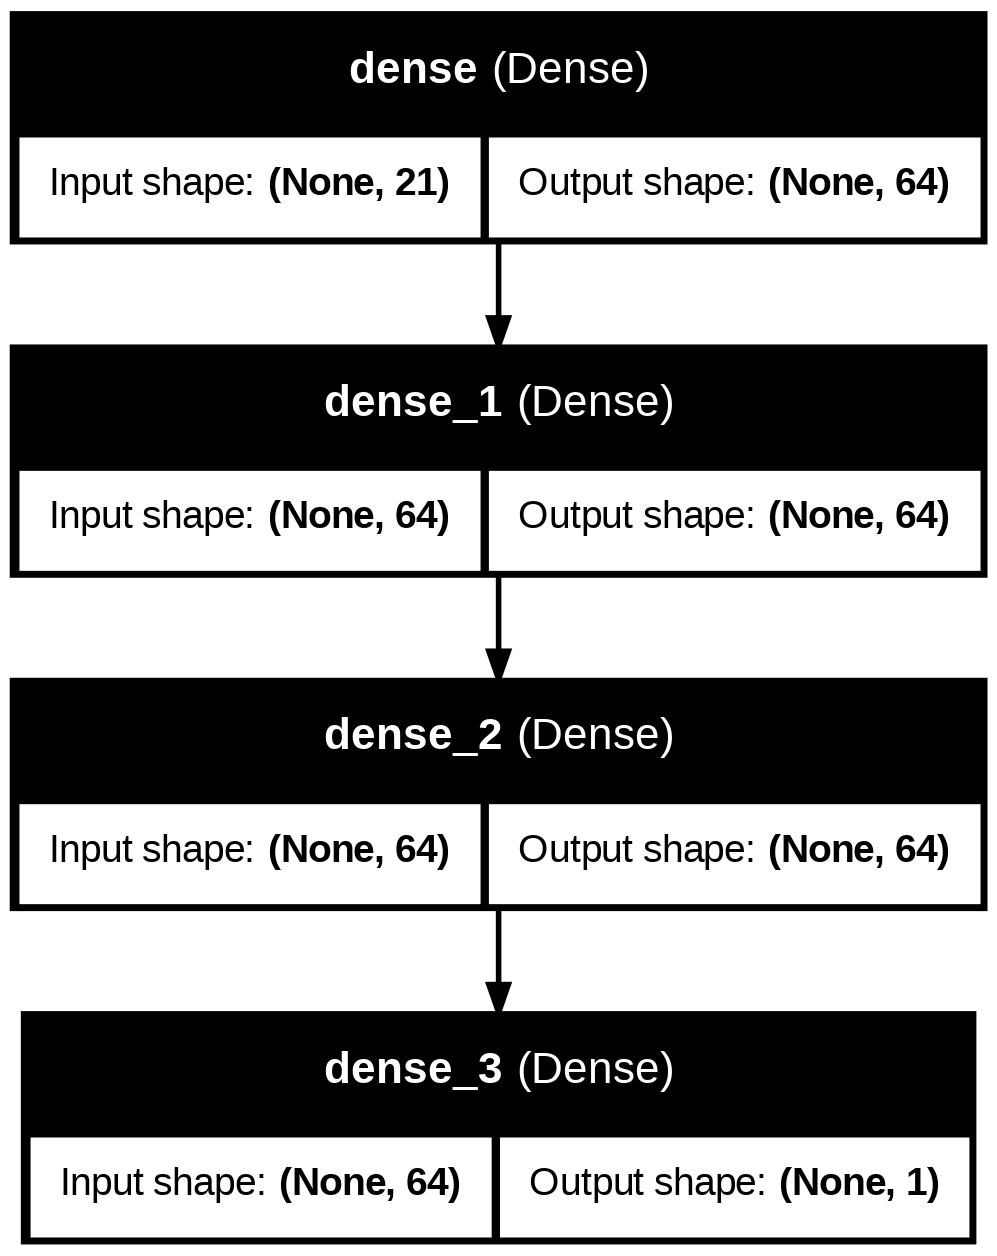

In [ ]:
from tensorflow.keras.utils import plot_model # Import the plot_model function

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Import necessary classes
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Assuming 'Status' is the column with categorical values
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'Status' column in your DataFrame X
X['Status'] = encoder.fit_transform(X['Status'])

# Now, proceed with fitting the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

<ipython-input-55-8dfe514f8180>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




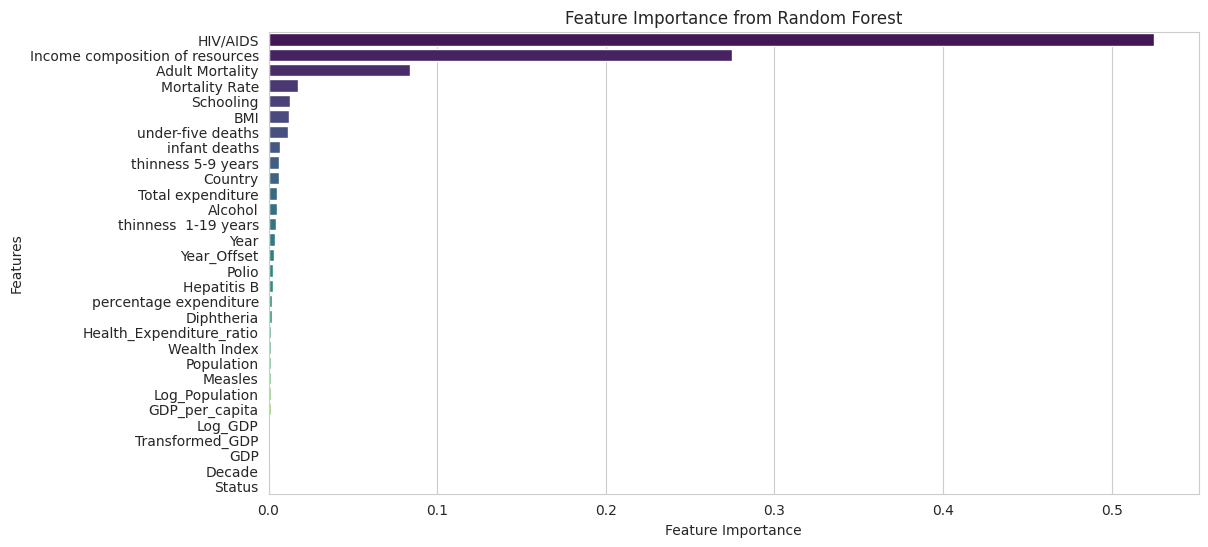

In [ ]:

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_idx], y=np.array(X.columns)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


In [ ]:


# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'Status' column in your DataFrame X_train and X_test
X_train['Status'] = encoder.fit_transform(X_train['Status'])
X_test['Status'] = encoder.transform(X_test['Status'])

# Now, proceed with fitting your models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Training and Evaluating Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R² Score": r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                       RMSE  R² Score
Linear Regression  3.321329  0.872720
Ridge Regression   3.322702  0.872615
Lasso Regression   3.354829  0.870139
Random Forest      1.712911  0.966146
Gradient Boosting  2.143586  0.946983
XGBoost            1.716636  0.965999


1. Linear Regression (RMSE: 3.321, R²: 0.872)

A relatively high RMSE compared to other models.
Good R² value but not the best.
Ridge Regression (RMSE: 3.322, R²: 0.872)

Almost the same performance as Linear Regression.
Slight improvement in handling overfitting due to regularization.
2. Lasso Regression (RMSE: 3.354, R²: 0.870)

Slightly worse than Linear and Ridge in both RMSE and R².
May have removed some features due to L1 regularization.
3. Random Forest (RMSE: 1.712, R²: 0.966)

Significantly lower RMSE compared to regression models.
Highest R² value, indicating excellent fit.
Handles non-linearity well.
4. Gradient Boosting (RMSE: 2.143, R²: 0.947)

Performs better than regression models.
Not as strong as Random Forest but still effective.
5. XGBoost (RMSE: 1.716, R²: 0.965)

Very close to Random Forest in both RMSE and R².
Robust and efficient for structured data.


In [ ]:
best_model = results_df.sort_values(by="R² Score", ascending=False).index[0]
print(f"\nBest Model: {best_model} with R² Score: {results_df.loc[best_model, 'R² Score']:.4f}")



Best Model: Random Forest with R² Score: 0.9661


# Conclusion

### Best Fit Model : Random Forest

If you want the most accurate predictions, Random Forest or XGBoost would be the best choice since they have the lowest error and highest accuracy.

The results indicate that different models have varying levels of accuracy in predicting the target variable. Traditional regression models like Linear Regression, Ridge Regression, and Lasso Regression show moderate performance, with RMSE values around 3.3 and R² scores close to 0.87. These models capture general trends but may not be flexible enough for complex patterns.

On the other hand, Random Forest and XGBoost significantly outperform the regression models, achieving the lowest RMSE (1.7) and highest R² scores (0.96). This means they make more precise predictions by effectively capturing complex relationships in the data.

- Understanding Best Fit Model:
Among all models, Random Forest and XGBoost provide the best performance. They have the lowest RMSE, indicating minimal errors, and the highest R² score, meaning they explain most of the variance in the target variable. If computational efficiency is not a constraint, XGBoost is often preferred due to its optimized boosting mechanism, making it robust for both accuracy and performance.

# Future Scope
1. Increase model accuracy
2. Gives suggestions on how to increase Life Expectancy
3. Mental health data was missing from the WHO data set which also plays the important role in affecting life expectancy